In [24]:
!pip install --upgrade plotly
!pip install jupyter-dash

     |████████████████████████████████| 20.6 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 3.10.0
    Uninstalling plotly-3.10.0:
      Successfully uninstalled plotly-3.10.0


     |████████████████████████████████| 1.1 MB 6.0 MB/s 
     |████████████████████████████████| 3.7 MB 37.3 MB/s 
     |████████████████████████████████| 83 kB 2.7 MB/s 
     |████████████████████████████████| 1.8 MB 56.2 MB/s 
     |████████████████████████████████| 357 kB 57.1 MB/s 
  Created wheel for dash: filename=dash-1.21.0-py3-none-any.whl size=1100489 sha256=4477bb5174d1437b928cb258305d22b4dac8116cb4a16539a7d0d9fd5b52f32e
  Stored in directory: /root/.cache/pip/wheels/59/a4/f1/a7140afcad8dbaa3b1b12ef80843d29403d6ecca1c2f397948
  Created wheel for dash-core-components: filename=dash_core_components-1.17.1-py3-none-any.whl size=3738995 sha256=018e5b9fd357b90920f01cc425ae89da8cfe4a317512736afa02bcc6f5f79f5e
  Stored in directory: /root/.cache/pip/wheels/ca/5b/fb/a135a7bf8e21223e4104aa5526a5173a20b64fe7fcd055b999
  Created wheel for dash-html-components: filename=dash_html_components-1.1.4-py3-none-any.whl size=319771 sha256=67aec04f5f14e33c7135243eed08dfeb831252277b5cc31cc5f6d02

In [34]:
''' let us import the usual required libraries'''
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot, plot


import plotly.graph_objs as go
#import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 
#read dataset
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv")

#exception handling
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


'''EDA EXCLUSIVE KERNEL'''

'EDA EXCLUSIVE KERNEL'

In [35]:
df.dtypes #shows datatypes of the different columns

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [36]:
df.describe()
#this provides various insights, (data needs to be scaled / normalized)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


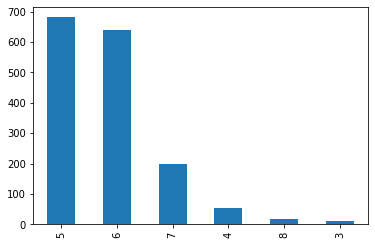

In [37]:
#show the distribution of the labels
df.quality.value_counts().plot.bar()
#sns.displot(df.quality.value_counts(),kde=True)

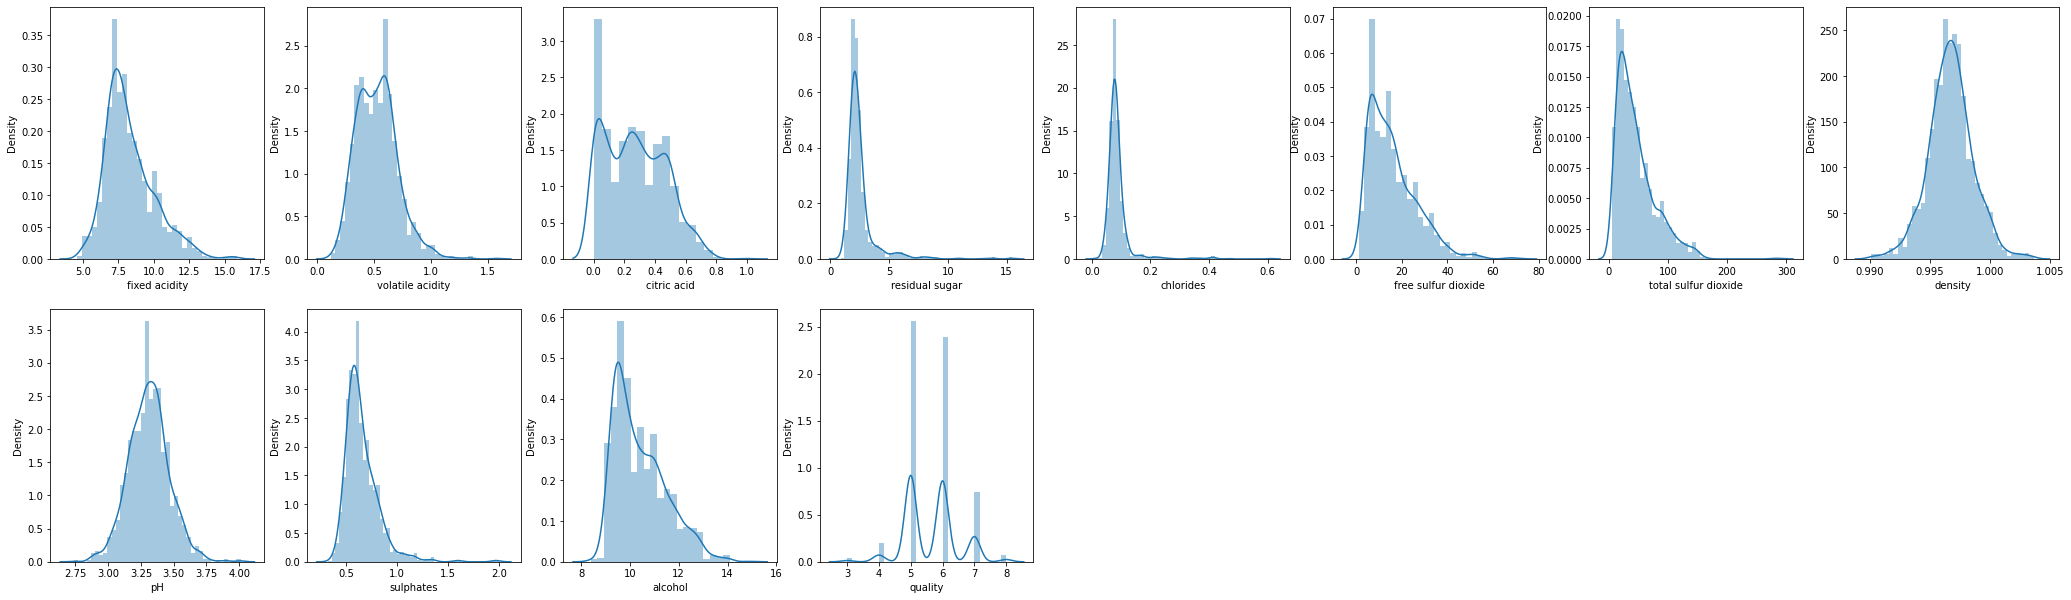

In [38]:
# distplots to see if we need normalization/transformations
l = df.columns.values
number_of_columns=len(list(df.columns))
number_of_rows = len(l)-(1/number_of_columns)
plt.figure(figsize=(3*number_of_columns,6*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 2,number_of_columns -4,i+1)
    sns.distplot(df[l[i]],kde=True)

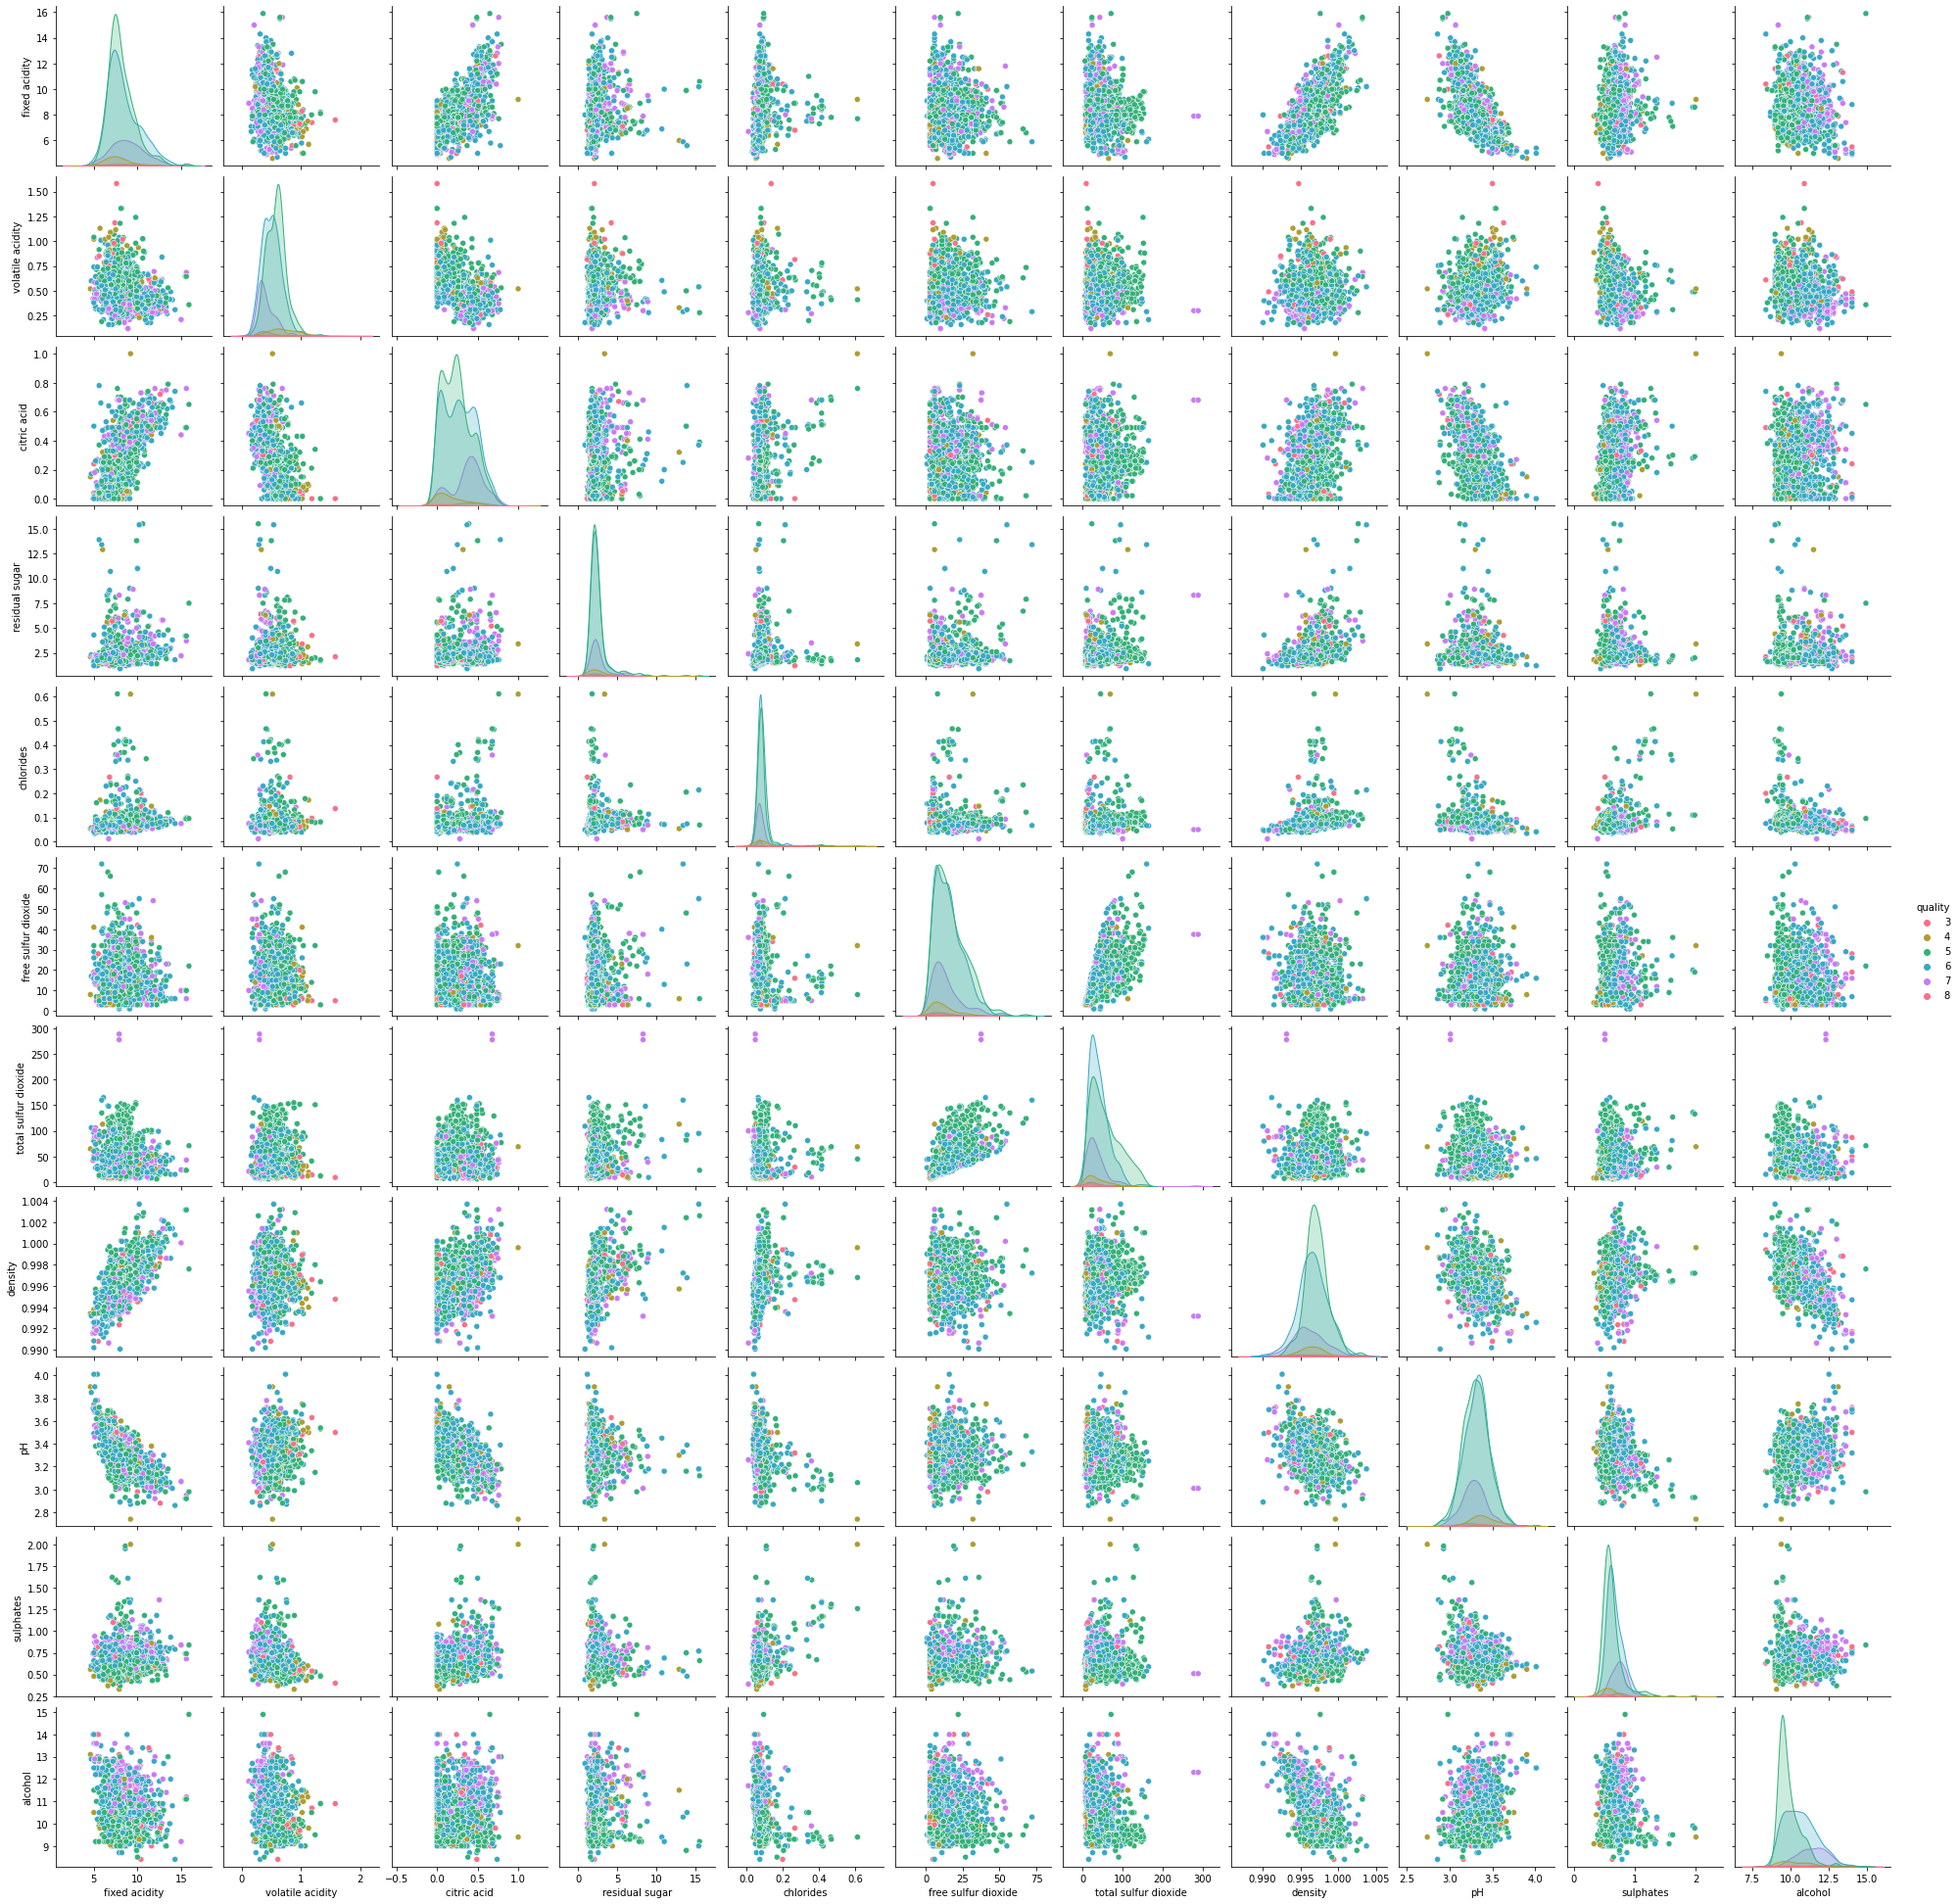

In [39]:
# PairPlot for multivariate analysis 
sns.pairplot(df, hue ='quality',palette="husl",
             diag_kind="kde")

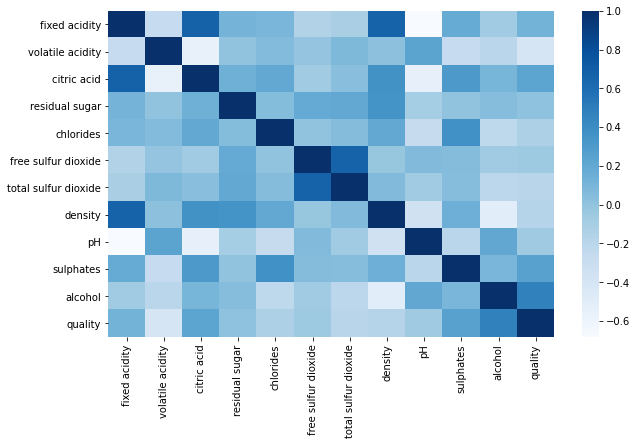

In [40]:
# Correlation Plot
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

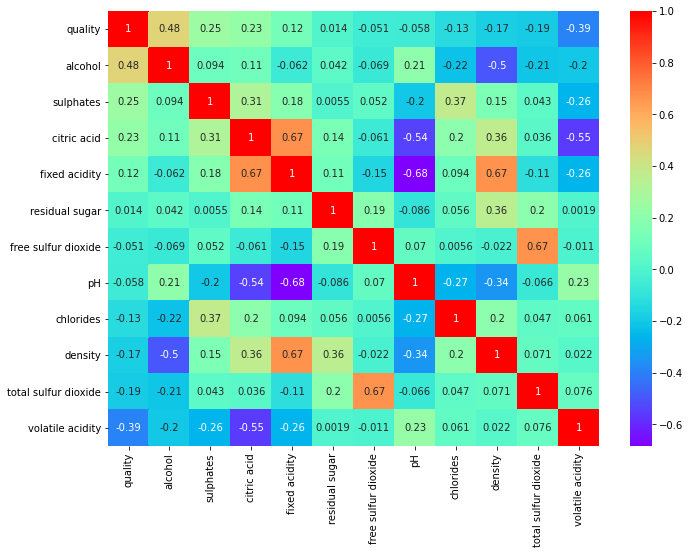

In [41]:
k = len(df.columns) #number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(11,8))
sns.heatmap(cm, annot=True, cmap = 'rainbow')

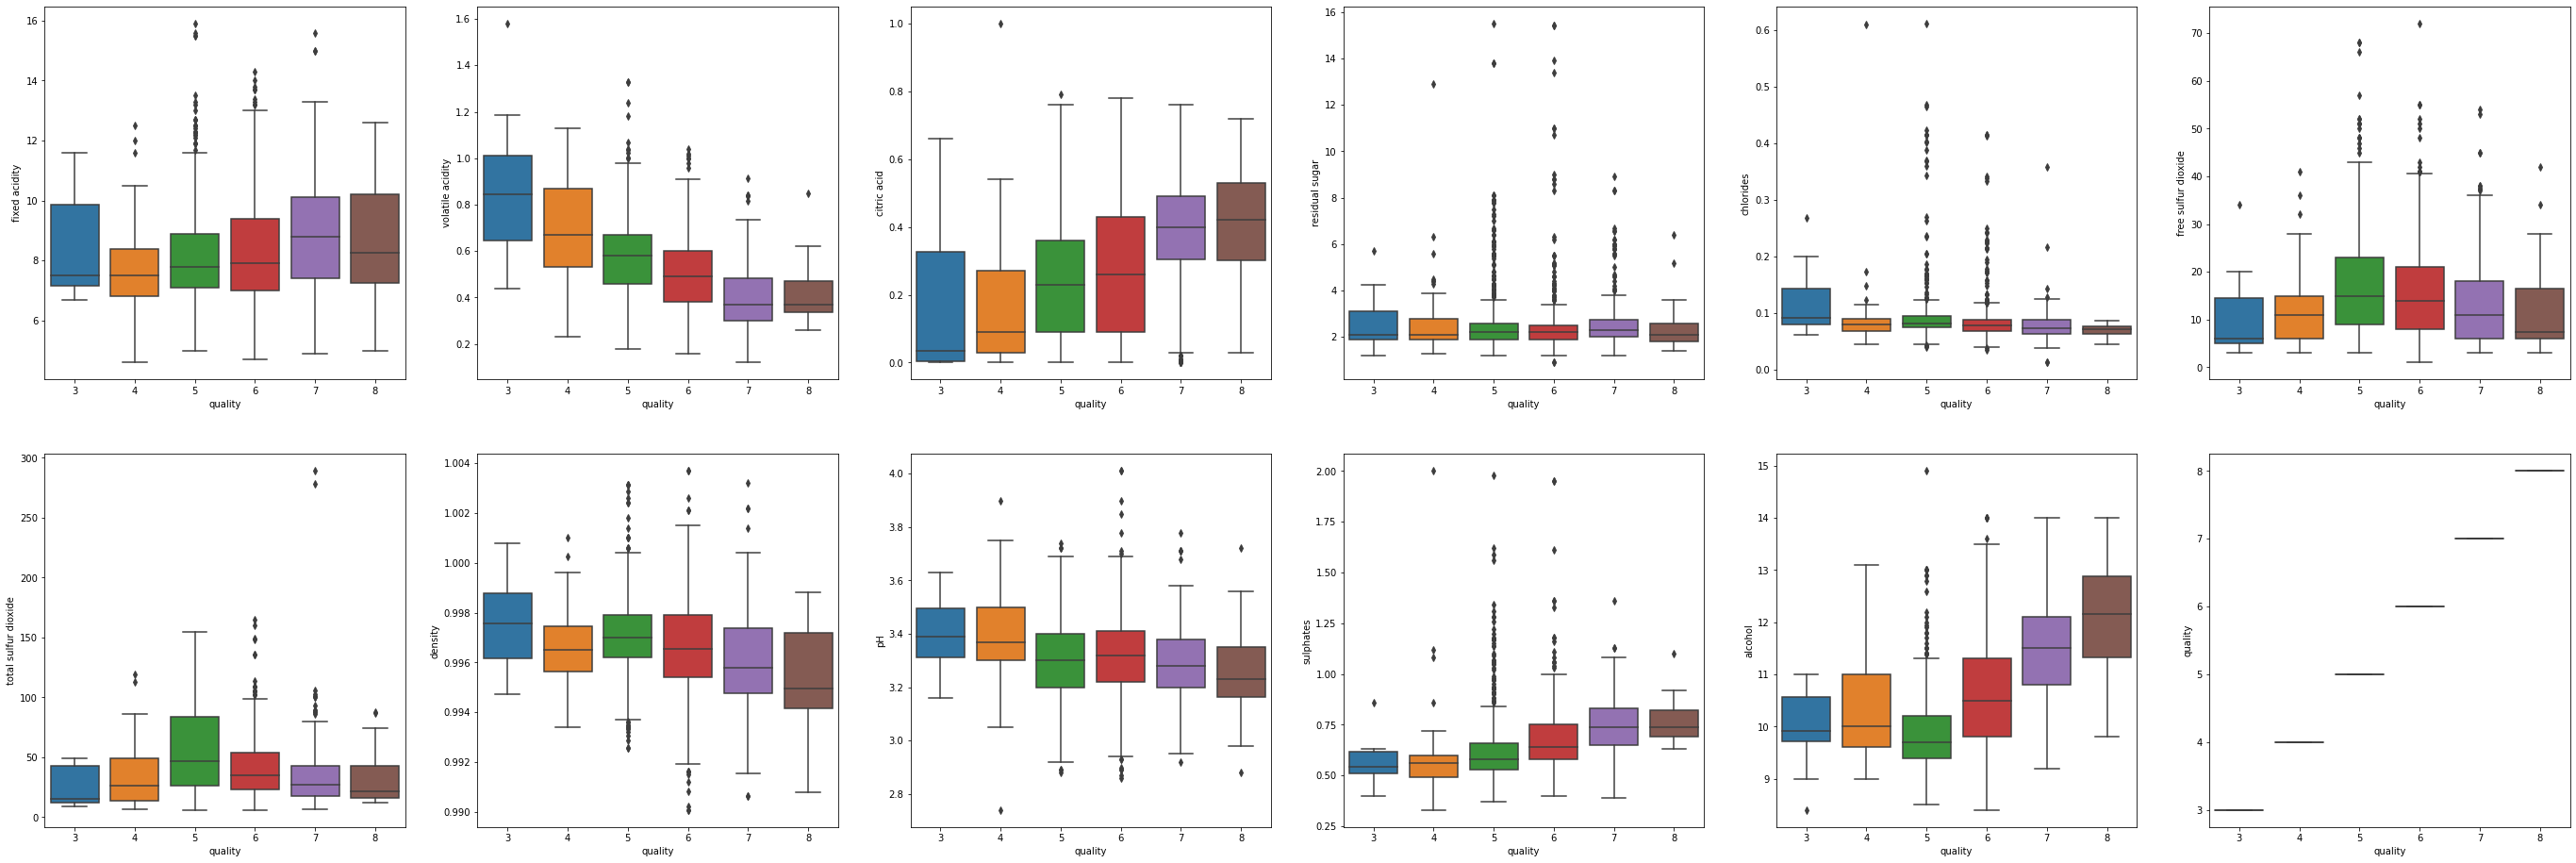

In [42]:
# check for outliers
l = df.columns.values
number_of_columns=6
number_of_rows = 2
plt.figure(figsize=(number_of_columns*8,number_of_rows*8))
for i in range(0,len(df.columns)):
    plt.subplot(number_of_rows,number_of_columns,i+1)
    sns.boxplot('quality', df[l[i]], data = df)
    #sns.distplot(df[l[i]],kde=True)

In [43]:
# make a 3D plot for the three most important features
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=df['volatile acidity'],
    y=df['alcohol'],
    z=df['sulphates'],
    mode='markers',
    marker=dict(
        size=3,
        color='rgb(149, 69, 214)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(l=0,r=0,b=0,t=0))
fig = go.Figure(data=data, layout=layout)
#iplot(fig)

# build jupyter dash app 
app = JupyterDash(__name__)
# add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
# run app inline
app.run_server(mode='inline') 

<IPython.core.display.Javascript object>

In [43]:
#feel free to expand this EDA 